KS Statistic Normal: 0.1977361740670074, p-value: 0.0
KS Statistic Pareto: 0.16739095167386797, p-value: 0.0
Best fit based on KS test: Pareto


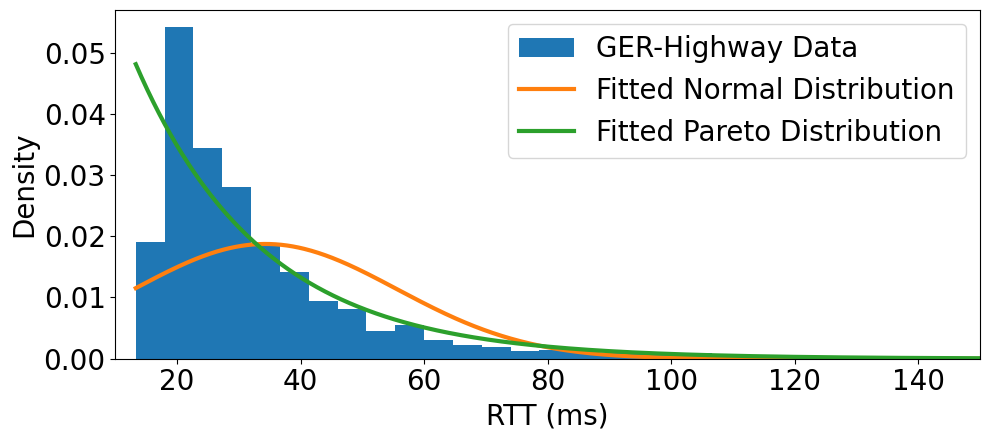

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pareto, norm
from scipy.optimize import minimize

rtt_trace = pd.read_csv('Data/Autobahn/RTT_Loss_Bridges.csv')
rtt_trace = rtt_trace[rtt_trace['time'] >= 0]
rtt_trace = rtt_trace[rtt_trace['time'] <= 200]
rtt_trace['time'] = rtt_trace['time'].astype(float)
data = rtt_trace['time'].dropna()

# Fit normal distribution
normal_params = norm.fit(data)
normal_dist = stats.norm(loc=normal_params[0], scale=normal_params[1])

# Fit Pareto distribution
pareto_params = pareto.fit(data)
pareto_dist = stats.pareto(b=pareto_params[0], loc=pareto_params[1], scale=pareto_params[2])

# Perform KS test
ks_stat_normal, ks_p_normal = stats.kstest(data, 'norm', args=normal_params)
ks_stat_pareto, ks_p_pareto = stats.kstest(data, 'pareto', args=pareto_params)

# Print KS test results
print(f"KS Statistic Normal: {ks_stat_normal}, p-value: {ks_p_normal}")
print(f"KS Statistic Pareto: {ks_stat_pareto}, p-value: {ks_p_pareto}")

# Recommend best fit based on the KS statistic
best_fit = min((ks_stat_normal, "Normal"), (ks_stat_pareto, "Pareto"), key=lambda x: x[0])
print(f"Best fit based on KS test: {best_fit[1]}")

# Evaluate and plot
fig, ax = plt.subplots(figsize=(10, 4.5))
x = np.linspace(min(data), max(data), 1000)
ax.hist(data, bins=40, density=True, label='GER-Highway Data')
plt.xlim(10, 150)
# Plot fitted distributions for comparison
ax.plot(x, normal_dist.pdf(x), label='Fitted Normal Distribution', lw=3)
ax.plot(x, pareto_dist.pdf(x), label='Fitted Pareto Distribution', lw=3)

fzsize = 20
plt.tick_params(axis='y', labelsize=fzsize)
plt.tick_params(axis='x', labelsize=fzsize)

plt.legend(fontsize=fzsize)
plt.xlabel('RTT (ms)', size=fzsize)
plt.ylabel('Density', size=fzsize)
plt.tight_layout()
#plt.title('Fits of Different Distributions')
plt.savefig("Plots/Fig15.pdf", format="pdf")